# Sprint 3 - AutoML
## Equipe Noname

	HENRICO NARDELLI BELA  - RM95985
	FELYPE NUNES DE SOUZA  - RM96232
	EMILLY GABRIELLY BISPO - RM94437
	SARA LEAL	       - RM96302
	DANIEL FARIA           - RM94026
    

---

# Conhecendo a base de dados de imagens, coca cola e fanta!

    Imports

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import glob, os
from matplotlib import pyplot as plt

    Acessando imagens de coca cola e fanta

In [3]:
folders_paths = glob.glob("dataset/train/*")
folders_paths

['dataset/train/coca', 'dataset/train/fanta']

In [4]:
path_coca = glob.glob(folders_paths[0] + "/*")
path_fanta = glob.glob(folders_paths[1] + "/*")

print(f"Imagens de coca-cola para treinamento: {len(path_coca)}\nImagens de fanta para treinamento: {len(path_fanta)}")

Imagens de coca-cola para treinamento: 200
Imagens de fanta para treinamento: 200


    Criando dataframe para receber o plano cartesiano das imagens

In [42]:
df_size = pd.DataFrame({"x": [np.nan] * 1000,"y": [np.nan] * 1000})

In [43]:
df_size

,x,y
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
995,NaN,NaN
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN


    Lendo o tamanho de cada imagem, e alimentando os dados para o dataframe

In [44]:
for i, path in enumerate(path_coca): 
    img = Image.open(path)
    df_size["x"][i] = img.size[0]
    df_size["y"][i] = img.size[1]

In [45]:
df_size.dropna(inplace = True)

In [48]:
df_size.describe()

,x,y
count,124.000000,124.000000
mean,650.967742,701.120968
std,512.764164,682.903302
min,133.000000,173.000000
25%,225.000000,271.000000
50%,555.000000,496.000000
75%,960.000000,960.000000
max,3456.000000,5184.000000


# Data Cleaning

    Convertendo tamanho de cada imagem dentro do dataset, para um melhor fit no treinamento da VGG16.

In [72]:

def convert_to_jpeg(input_path, output_path):
    try:
        img = Image.open(input_path)
        img = img.resize((675,675))
        img = img.convert("RGB")
        img.save(output_path, 'JPEG')

    except Exception as e:
        print(f"Erro ao processar o arquivo: {e}")

/Users/henricobela/Library/Python/3.9/lib/python/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


    Cocacola

In [ ]:
diretorio_origem = 'SAP-GPT/model/dataset/train/coca'
diretorio_destino = 'SAP-GPT/model/dataset/train/coca'
arquivos = os.listdir(diretorio_origem)

i = 1
for arquivo in arquivos:
    nome = "coca_" + f"{i}"
    arquivo_completo_origem = os.path.join(diretorio_origem, arquivo)
    arquivo_completo_destino = os.path.join(diretorio_destino, f'{nome}.jpeg')
    convert_to_jpeg(arquivo_completo_origem, arquivo_completo_destino)
    i += 1

    Fanta

In [73]:
diretorio_origem = 'SAP-GPT/model/dataset/train'
diretorio_destino = 'SAP-GPT/model/dataset/train'
arquivos = os.listdir(diretorio_origem)

i = 1
for arquivo in arquivos:
    nome = "fanta_" + f"{i}"
    arquivo_completo_origem = os.path.join(diretorio_origem, arquivo)
    arquivo_completo_destino = os.path.join(diretorio_destino, f'{nome}.jpeg')
    convert_to_jpeg(arquivo_completo_origem, arquivo_completo_destino)
    i += 1

    Realizando a augumentacao dos dados, para obter mais amostras e assim, obter uma melhor metrica de assertividade.

In [78]:
import Augmentor

In [79]:
p = Augmentor.Pipeline("SAP-GPT/model/dataset/train")

Initialised with 103 image(s) found.
Output directory set to /Users/henricobela/Downloads/dataset/fanta/imgs_jpg/output.

In [80]:
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.skew(0.4, 0.5)
p.sample(100)

Processing <PIL.Image.Image image mode=RGB size=675x675 at 0x141A2A640>: 100%|██████████| 100/100 [00:00<00:00, 131.66 Samples/s]                 


In [84]:
path_coca = "SAP-GPT/model/dataset/train/coca"
path_fanta = "SAP-GPT/model/dataset/train/fanta"
paths = [path_coca, path_fanta]

diretorio_origem = paths
diretorio_destino = 'SAP-GPT/model/dataset/train'

arquivos = os.listdir(diretorio_origem)

In [85]:
i = 1
for arquivo in arquivos:
    nome = "coca_aug" + f"{i}"
    arquivo_completo_origem = os.path.join(diretorio_origem, arquivo)
    arquivo_completo_destino = os.path.join(diretorio_destino, f'{nome}.jpeg')
    convert_to_jpeg(arquivo_completo_origem, arquivo_completo_destino)
    i += 1

In [87]:
diretorio_origem = path_fanta
diretorio_destino = 'SAP-GPT/model/dataset/train'
arquivos = os.listdir(diretorio_origem)

In [88]:
i = 1
for arquivo in arquivos:
    nome = "fanta_aug" + f"{i}"
    arquivo_completo_origem = os.path.join(diretorio_origem, arquivo)
    arquivo_completo_destino = os.path.join(diretorio_destino, f'{nome}.jpeg')
    convert_to_jpeg(arquivo_completo_origem, arquivo_completo_destino)
    i += 1

    Criando dataframe para receber os dados de todos as imagens no dataset

In [2]:
df = pd.DataFrame({"x_coca": [np.nan] * 1000,"y_coca": [np.nan] * 1000, "x_fanta": [np.nan] * 1000,"y_fanta": [np.nan] * 1000})

    Preenchendo dados do dataframe, com o tamanho da imagem

In [4]:
for i, path in enumerate(path_coca):
    img = Image.open(path)
    df["x_coca"][i] = img.size[0]
    df["y_coca"][i] = img.size[1]

for i, path in enumerate(path_fanta):
    img = Image.open(path)
    df["x_fanta"][i] = img.size[0]
    df["y_fanta"][i] = img.size[1]

In [5]:
df.dropna(inplace = True)

In [6]:
df.describe()

,x_coca,y_coca,x_fanta,y_fanta
count,203.0,203.0,203.0,203.0
mean,675.0,675.0,675.0,675.0
std,0.0,0.0,0.0,0.0
min,675.0,675.0,675.0,675.0
25%,675.0,675.0,675.0,675.0
50%,675.0,675.0,675.0,675.0
75%,675.0,675.0,675.0,675.0
max,675.0,675.0,675.0,675.0


In [7]:
df

,x_coca,y_coca,x_fanta,y_fanta
0,675.0,675.0,675.0,675.0
1,675.0,675.0,675.0,675.0
2,675.0,675.0,675.0,675.0
3,675.0,675.0,675.0,675.0
4,675.0,675.0,675.0,675.0
...,...,...,...,...
198,675.0,675.0,675.0,675.0
199,675.0,675.0,675.0,675.0
200,675.0,675.0,675.0,675.0
201,675.0,675.0,675.0,675.0


# EDA

    Imports necessarios

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    Concatenando todos os caminhos das imagens para criar um novo dataframe

In [6]:
paths = path_coca + path_fanta

    Visualizando uma amostra

In [7]:
img = Image.open(paths[0])

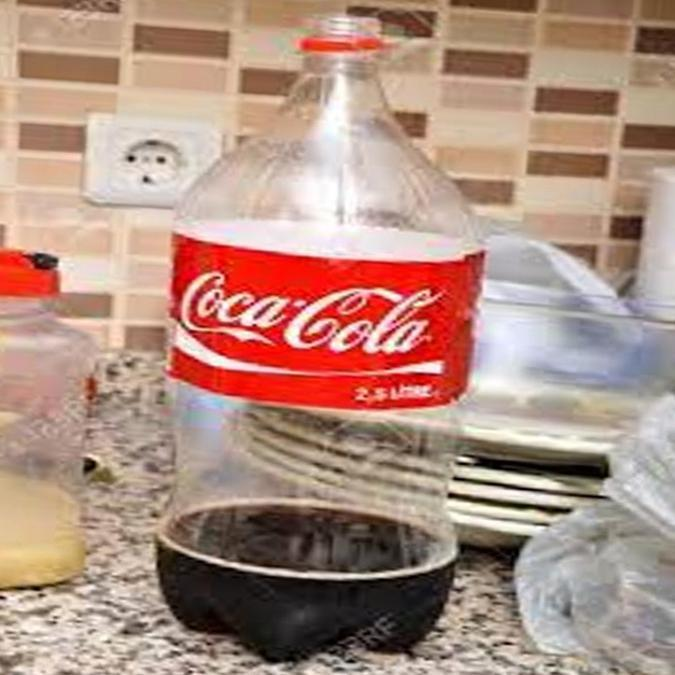

In [8]:
img

    Novo dataframe

In [19]:
df = pd.DataFrame(
    data = [path_coca, path_fanta],
).T

    Renomeando as colunas existentes

In [20]:
df.rename(
    columns = {
            df.columns[0]:"coca_path",
            df.columns[1]:"fanta_path"
            }, inplace = True)

In [21]:
df

,coca_path,fanta_path
0,dataset/train/coca/coca_aug60.jpeg,dataset/train/fanta/fanta_aug53.jpeg
1,dataset/train/coca/coca_18.jpeg,dataset/train/fanta/fanta_aug95.jpeg
2,dataset/train/coca/coca_aug100.jpeg,dataset/train/fanta/fanta_68.jpeg
3,dataset/train/coca/coca_aug74.jpeg,dataset/train/fanta/fanta_22.jpeg
4,dataset/train/coca/coca_aug11.jpeg,dataset/train/fanta/fanta_aug69.jpeg
...,...,...
195,dataset/train/coca/coca_aug44.jpeg,dataset/train/fanta/fanta_3.jpeg
196,dataset/train/coca/coca_59.jpeg,dataset/train/fanta/fanta_aug61.jpeg
197,dataset/train/coca/coca_86.jpeg,dataset/train/fanta/fanta_65.jpeg
198,dataset/train/coca/coca_aug52.jpeg,dataset/train/fanta/fanta_aug29.jpeg


    Algumas amostras de coca cola

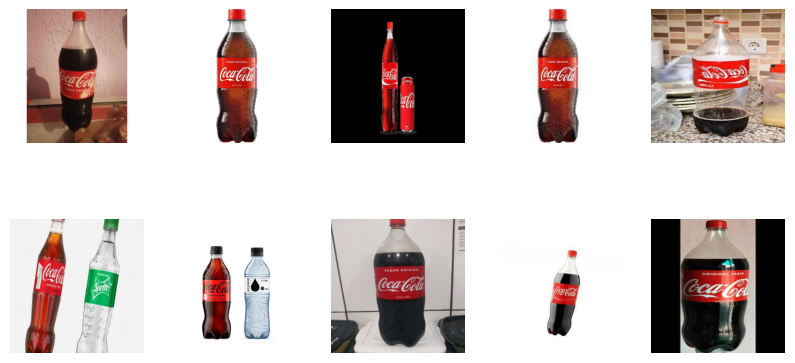

In [48]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = Image.open(df.loc[np.random.randint(len(df)), "coca_path"])
    ax.imshow(img)
    ax.axis('off')
plt.show()

    Algumas amostras de fanta guarana


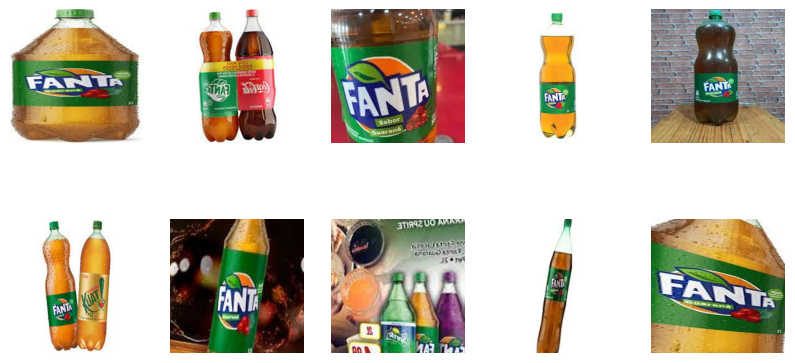

In [75]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = Image.open(df.loc[np.random.randint(len(df)), "fanta_path"])
    ax.imshow(img)
    ax.axis('off')
plt.show()

    Intensidade de Pixeis

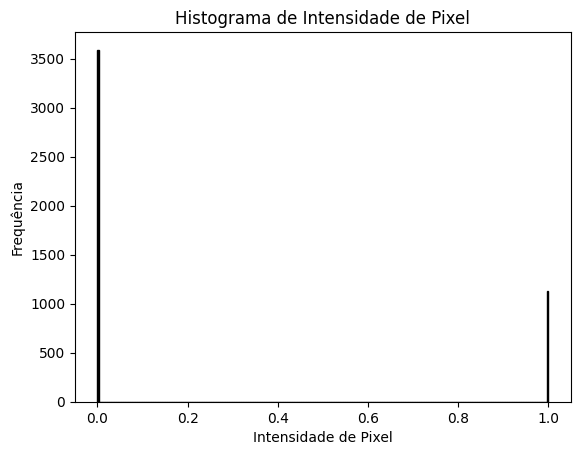

In [22]:
plt.hist(np.array(img).ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade de Pixel')
plt.show()

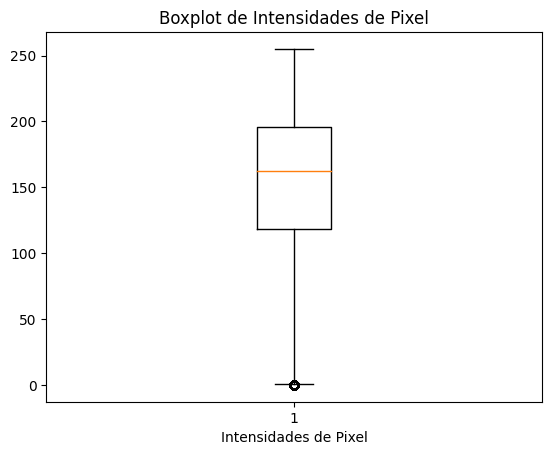

In [23]:
plt.boxplot(np.array(img).reshape(-1))
plt.xlabel('Intensidades de Pixel')
plt.title('Boxplot de Intensidades de Pixel')
plt.show()

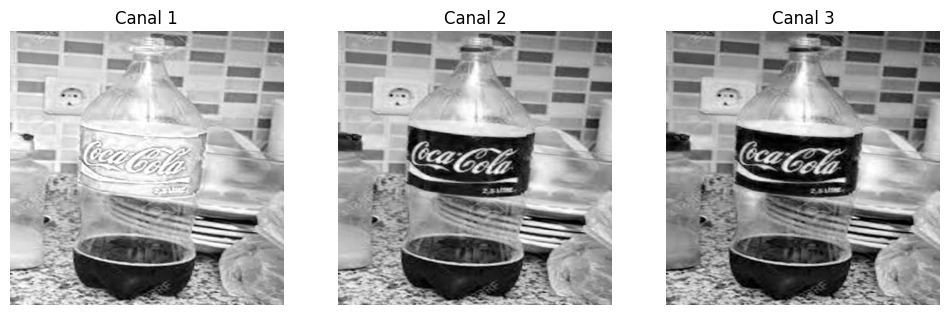

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(np.array(img)[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Canal {i+1}')
plt.show()

    Verificando as cores predominantes em imagens, com base na Matiz!

In [26]:
import cv2

def extrair_cor_caracteristica(caminho_imagem):
    cores = {"r": 0, "g": 1, "b": 2}
    nomes_cores = {"r": "vermelho", "g": "verde", "b": "azul"}
    img = cv2.imread(caminho_imagem, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))

    histogramas = {}
    for cor in cores:
        histograma = cv2.calcHist([img], [cores[cor]], None, [256], [0, 256])
        histogramas[cor] = histograma
        plt.plot(histograma, color=cor)

    nome_imagem = caminho_imagem.split("/")[-1]

    histograma_r, histograma_g, histograma_b = histogramas.values()
    histograma_normalizado = cv2.normalize(
        histograma_r + histograma_g + histograma_b,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
    )

    cor_dominante = np.unravel_index(
        np.argmax(histograma_normalizado, axis=None), histograma_normalizado.shape
    )
    cor_dominante = np.array([[[cor_dominante[0], 255, 255]]], dtype=np.uint8)
    cor_dominante = cv2.cvtColor(cor_dominante, cv2.COLOR_HSV2BGR)[0][0]

    plt.title(f"Histograma da Imagem {nome_imagem}")
    plt.xlabel("Matiz")
    plt.ylabel("Pixels")

    nome_cor_dominante = None
    for cor, nome_cor in nomes_cores.items():
        if cor_dominante[cores[cor]] > 128:
            nome_cor_dominante = nome_cor

    if nome_cor_dominante:
        plt.text(
            1.1,
            0.5,
            f"A cor predominante é: {nome_cor_dominante}",
            transform=plt.gca().transAxes,
            fontsize=12,
            ha="left",
            va="center",
        )
    else:
        plt.text(
            1.1,
            0.5,
            "Não foi possível determinar a cor predominante",
            transform=plt.gca().transAxes,
            fontsize=12,
            ha="left",
            va="center",
        )

    plt.show()

    return nome_cor_dominante


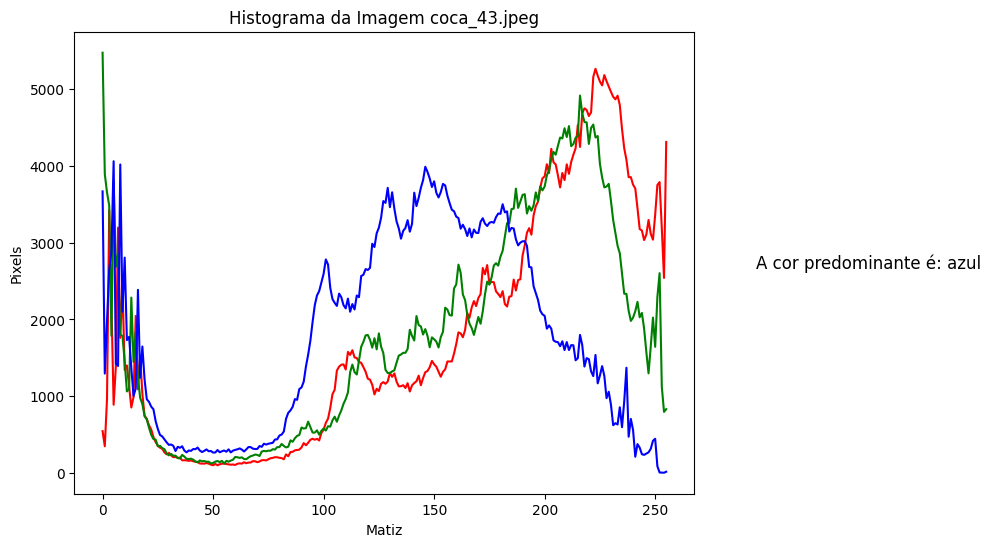

'azul'

In [27]:
extrair_cor_caracteristica(df.loc[np.random.randint(len(df)), "coca_path"])

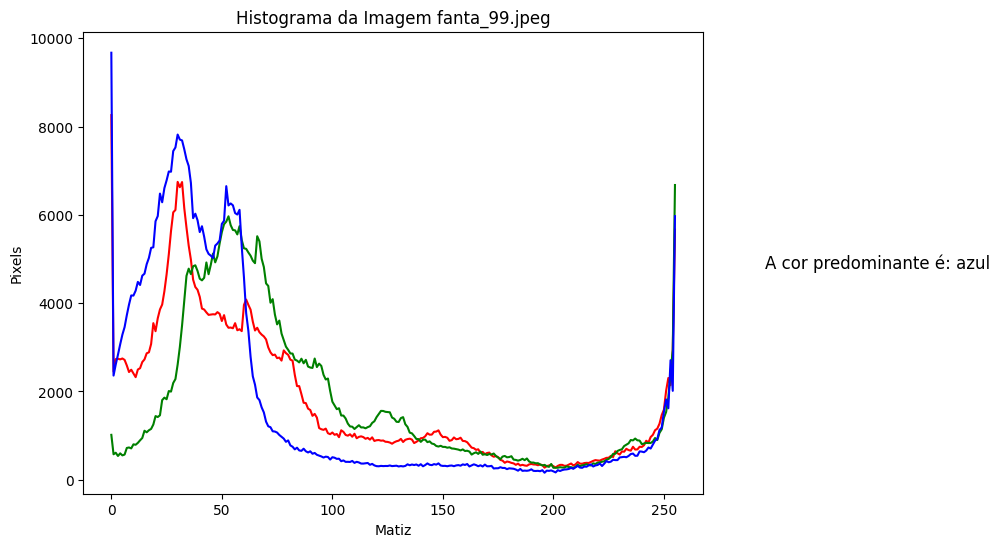

'azul'

In [47]:
extrair_cor_caracteristica(df.loc[np.random.randint(len(df)), "fanta_path"])

---

De acordo com o EDA, as imagens estao configuradas e no formato ideal para comecar o re-treinamento da VGG16, que foi o modelo escolhido para a deteccao e classificacao do refrigerante!